<h2> Taller 6 - controlBelt - Lógica difusa para el control de posición</h2>

<br>Requiere el simulador CoppeliaSim con la escena controlBelt.ttt cargada.
<br>Requiere además que los archivos 'sim.py', 'simConst.py', 'remoteapi.dll' estén alojados en la misma carpeta que este cuaderno de Jupyter
<br><h4> Instrucciones</h4>
<br>1. Abra la escena controlBelt.ttt
<br>2. Inicie la simulación en CoppeliaSim.
<br>3. A continuación ejecute las celdas de código desde el cuaderno de Jupyter.


In [1]:
import sim
import numpy as np
import fuzzy
import matplotlib.pyplot as plt

### 1. Definimos varias funciones para conectarnos con el simulador
Para mayor información sobre la API remota de CoppeliaSim para Python, refiérase a la documentación oficial en https://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm

In [2]:
def connect(port):
# Establece la conexión al simulador
# port debe coincidir con el puerto de conexión en CoppeliaSIm
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID


In [3]:
def moveBelt(V):
# acciona la correa transportadora
# V es Float con el valor de voltaje que se pasará a la función setVelocity
    res,retInts,retFloats,retStrings,retBuffer=sim.simxCallScriptFunction(clientID,
        "ConveyorBelt", sim.sim_scripttype_childscript,"setVelocity",[],[V],[],"", sim.simx_opmode_blocking)
    return res

In [4]:
def getPos(objName):
# obtiene la posición [x y z] de un objeto
# objName es un String con el nombre del objeto
    res,handler=sim.simxGetObjectHandle(clientID,objName,sim.simx_opmode_blocking)
    if res==0:
        res, pos=sim.simxGetObjectPosition(clientID,handler,-1,sim.simx_opmode_blocking)
        if res==0:
            return pos
    else:
        return -1

In [5]:
def getSimTime():
# obtiene el instante de tiempo de simulación en que se ejecutó 
# la última instrucción en el simulador
    return sim.simxGetLastCmdTime(clientID)

### 2. Verificamos la comunicación

In [6]:
# Conectarse al servidor de VREP
# *** ejecutar cada vez que se reinicia la simulación ***
clientID = connect(19999)
clientID = connect(19999)
clientID = connect(19999)

no se pudo conectar


In [7]:
# moveBelt(volt) envía al motor un voltaje en Volts
moveBelt(0)

64

In [8]:
# Obtiene la posición del objeto "Sphere"
getPos("Sphere")[0]

TypeError: 'int' object is not subscriptable

<h3> 3. Probamos el control proporcional</h3>
La velocidad de la correa será proporcional a la diferencia de distancia entre la posición deseada (target) y la posición de la esfera. Con Kp = 0.8, será nuestra referencia para comparar el controlador difuso.

conectado a 19999


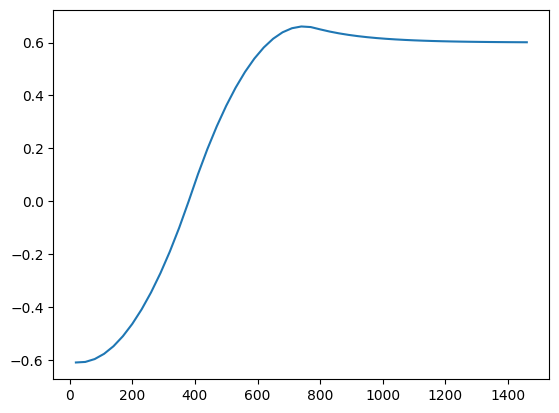

In [ ]:
# Establecemos la conexión con el simulador
clientID = connect(19999)

# Verificamos que el motor esté detenido
moveBelt(0)

# Verificamos los parámetros del controlador
kp = 18    # la constante proporcional

# Definimos los parámetros de la simulación ---------------
t_inicial = getSimTime()      # tiempo inicial en milisegundos
t_final = 5000    # tiempo final en milisegundos 

# Definimos los valores iniciales -------------------------
pos_actual = getPos("Sphere")[0]   # posición inicial en metros
pos_deseada = 0.6 # posición deseada en metros
vmotor = 0        # voltaje inicial del motor

# Definimos las variables requeridas para la graficar -----
t = []
pos = []

# Ahora entramos al lazo de control
# calculamos repetidas veces hasta que se cumpla la condición de salida
while (True):
    # obtenemos los datos de tiempo y posición
    t_actual = getSimTime() - t_inicial
    pos_actual = getPos("Sphere")[0]
    e =  pos_deseada - pos_actual
    
    # aquí trabaja el controlador ------------
    vmotor = kp*e
    moveBelt(vmotor)
    # ----------------------------------------
    
    # guardamos los datos actuales para graficar
    t.append(t_actual)
    pos.append(pos_actual)
    
    # y verificamos las condiciones de salida
    if abs(e) < 0.001: break  # la bola llegó a la posición
    if abs(pos_actual) > 0.7: break #  la bola salió de los límites
    if t_actual >= t_final: break # terminó el tiempo de simulación

# detenemos el motor
moveBelt(0)

# y graficamos los resultados
plt.plot(t, pos)   
plt.show()

<h3> 4. Taller 6 - Diseño del controlador difuso para la correa transportadora</h3>
Aplique el procedimiento de diseño ensayado anteriormente para conseguir un controlador difuso para el sistema de correa transportadora y esfera.<br><br>
Considere los siguientes requerimientos de diseño:<br>
- La posición de la bola debe ser controlada en el rango de trabajo desde -0.6 a 0.6 mts.<br>
- El motor debe recibir voltajes entres -10 y 10 volts.<br>
- Diseñe su controlador para privilegiar el tiempo de respuesta, manteniendo el controlador estable dentro del rango de movimientos permitidos (debe ser estable para los movimientos desde -0.6 a 0.6 y también desde 0.6 a -0.6).<br>
<br> Desarrolle su solución en este mismo cuaderno de Jupyter. Muestre los gráficos para las funciones de membresía de entrada y salida, la curva de respuesta del cntrolador y también un gráfico para la respuesta ante un movimiento desde -0.6 a 0.6 mts.